# Mini-project: Review of FTSE stocks since Brexit, part 2

## Import required packages

In [1]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
from matplotlib import pyplot as plt 

### Import list of companies and tickers to review, from Part 1

In [2]:
p1_df = pd.read_csv('top_performers.csv', index_col='Ticker')

In [3]:
p1_df.drop(columns=['Unnamed: 0', 'index'], inplace=True)
p1_df.head()

,Symbols,Brexit,2_years_later,Gain/(loss),% Gain/(loss),Name,Market
Ticker,,,,,,,
AAF,AAF.L,64.843224,152.500000,87.656776,135.182632,AIRTEL AFRICA PLC ORD USD0.50,FTSE 100
AHT,AHT.L,2372.657471,5246.000000,2873.342529,121.102290,ASHTEAD GROUP PLC ORD 10P,FTSE 100
BME,BME.L,281.070312,566.200012,285.129700,101.444260,B&M EUROPEAN VALUE RETAIL S.A. ORD 10P (DI),FTSE 100
BRWM,BRWM.L,302.175354,630.000000,327.824646,108.488214,BLACKROCK WORLD MINING TRUST PLC ORD 5P,FTSE 250
DRX,DRX.L,237.726257,601.000000,363.273743,152.811787,DRAX GROUP PLC ORD 11 16/29P,FTSE 250


## Let us start with the FTSE 100 companies:

Set the filter:

In [4]:
filt = p1_df['Market'] == 'FTSE 100'

In [5]:
p1_df[filt]

,Symbols,Brexit,2_years_later,Gain/(loss),% Gain/(loss),Name,Market
Ticker,,,,,,,
AAF,AAF.L,64.843224,152.500000,87.656776,135.182632,AIRTEL AFRICA PLC ORD USD0.50,FTSE 100
AHT,AHT.L,2372.657471,5246.000000,2873.342529,121.102290,ASHTEAD GROUP PLC ORD 10P,FTSE 100
BME,BME.L,281.070312,566.200012,285.129700,101.444260,B&M EUROPEAN VALUE RETAIL S.A. ORD 10P (DI),FTSE 100
GLEN,GLEN.L,189.506653,383.000000,193.493347,102.103723,GLENCORE PLC ORD USD0.01,FTSE 100


We are going to review the price patterns for the two years before and after Brexit, to see if there are any observable differences in the trends.

First we must define the dates and retrieve the prices between the start and end dates.

In [6]:
b_minus_2 = dt.datetime(2018,1,31)
brexit_date = dt.datetime(2020,1,31)
b_plus_2 = dt.datetime(2022,1,31)

In [7]:
f100_df = pdr.get_data_yahoo(['AAF.L', 'AHT.L', 'BME.L', 'GLEN.L'], b_minus_2, b_plus_2)

The columns returned by the yahoo API using the .columns command show the following for each stock: 'Adj Close', 'Close', 'High', 'Low', 'Open', and 'Volume'.

Of these, we are going to use the 'Adjusted close' as the best representation of the daily price.

In [8]:
f100_df = f100_df['Adj Close']

This data now returns a price for each stock two years before and after Brexit:

In [9]:
f100_df

Symbols,AAF.L,AHT.L,BME.L,GLEN.L
Date,,,,
2018-01-31,NaN,1965.292725,308.414032,296.033295
2018-02-01,NaN,1946.620117,311.380249,293.173431
2018-02-02,NaN,1899.004883,307.524139,280.670685
2018-02-05,NaN,1899.938599,302.333221,283.677185
2018-02-06,NaN,1865.394409,298.847870,277.224121
...,...,...,...,...
2022-01-25,144.572922,4874.688965,542.169006,373.407257
2022-01-26,145.746719,4990.259277,544.109497,383.151642
2022-01-27,141.149353,5160.157227,542.945190,387.087830


### Now let us visualize these prices graphically.

First we need to reset the index, and check the format of the Date field.

In [10]:
f100_df['Index'] = 1

In [11]:
f100_df.reset_index(drop=False, inplace=True)

In [12]:
f100_df.set_index('Index')

Symbols,Date,AAF.L,AHT.L,BME.L,GLEN.L
Index,,,,,
1,2018-01-31,NaN,1965.292725,308.414032,296.033295
1,2018-02-01,NaN,1946.620117,311.380249,293.173431
1,2018-02-02,NaN,1899.004883,307.524139,280.670685
1,2018-02-05,NaN,1899.938599,302.333221,283.677185
1,2018-02-06,NaN,1865.394409,298.847870,277.224121
...,...,...,...,...,...
1,2022-01-25,144.572922,4874.688965,542.169006,373.407257
1,2022-01-26,145.746719,4990.259277,544.109497,383.151642
1,2022-01-27,141.149353,5160.157227,542.945190,387.087830


In [13]:
f100_df['Date'].dtype

dtype('<M8[ns]')

We can see from the above that that date column is already the correct format.

Next we must set the data for the X and Y axes on the chart.

In [14]:
x = f100_df['Date']
y = f100_df['AAF.L']
y2 = f100_df['BME.L']
y3 = f100_df['AHT.L']
y4 = f100_df['GLEN.L']

**Now we plot the chart for the preliminary review.**

Since the Ashtead Group (AHT.L) price is significantly more than the others, it has been excluded to prevent the chart from being squashed too much.

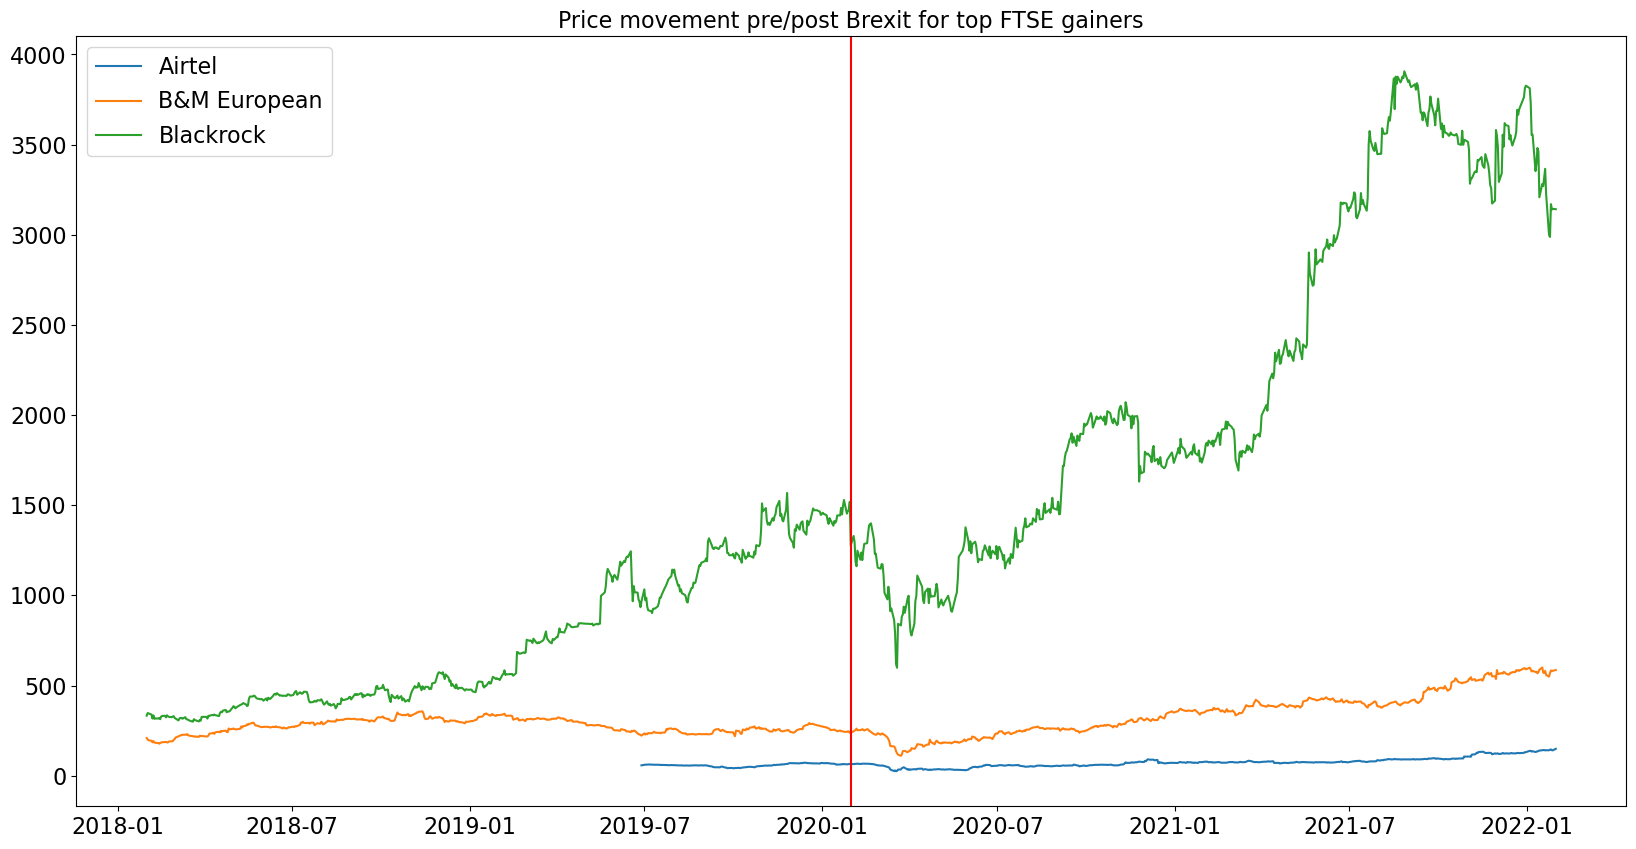

In [32]:
# Set title
plt.title('Price movement pre/post Brexit for top FTSE gainers')

# Define X and Y axes
plt.plot(x, y, label='Airtel')
plt.plot(x, y2, label='B&M European')
# plt.plot(x, y3, label='Ashtead')
plt.plot(x, y4, label='Blackrock')

# Add legend key and line for Brexit
plt.legend()
plt.axvline(brexit_date, color="r")

# Increase chart size
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 100
plt.rc('axes', titlesize=16) 
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('legend', fontsize=16)  

Now we repeat the process Ashtead for separately as the Y axis values are much higher: 

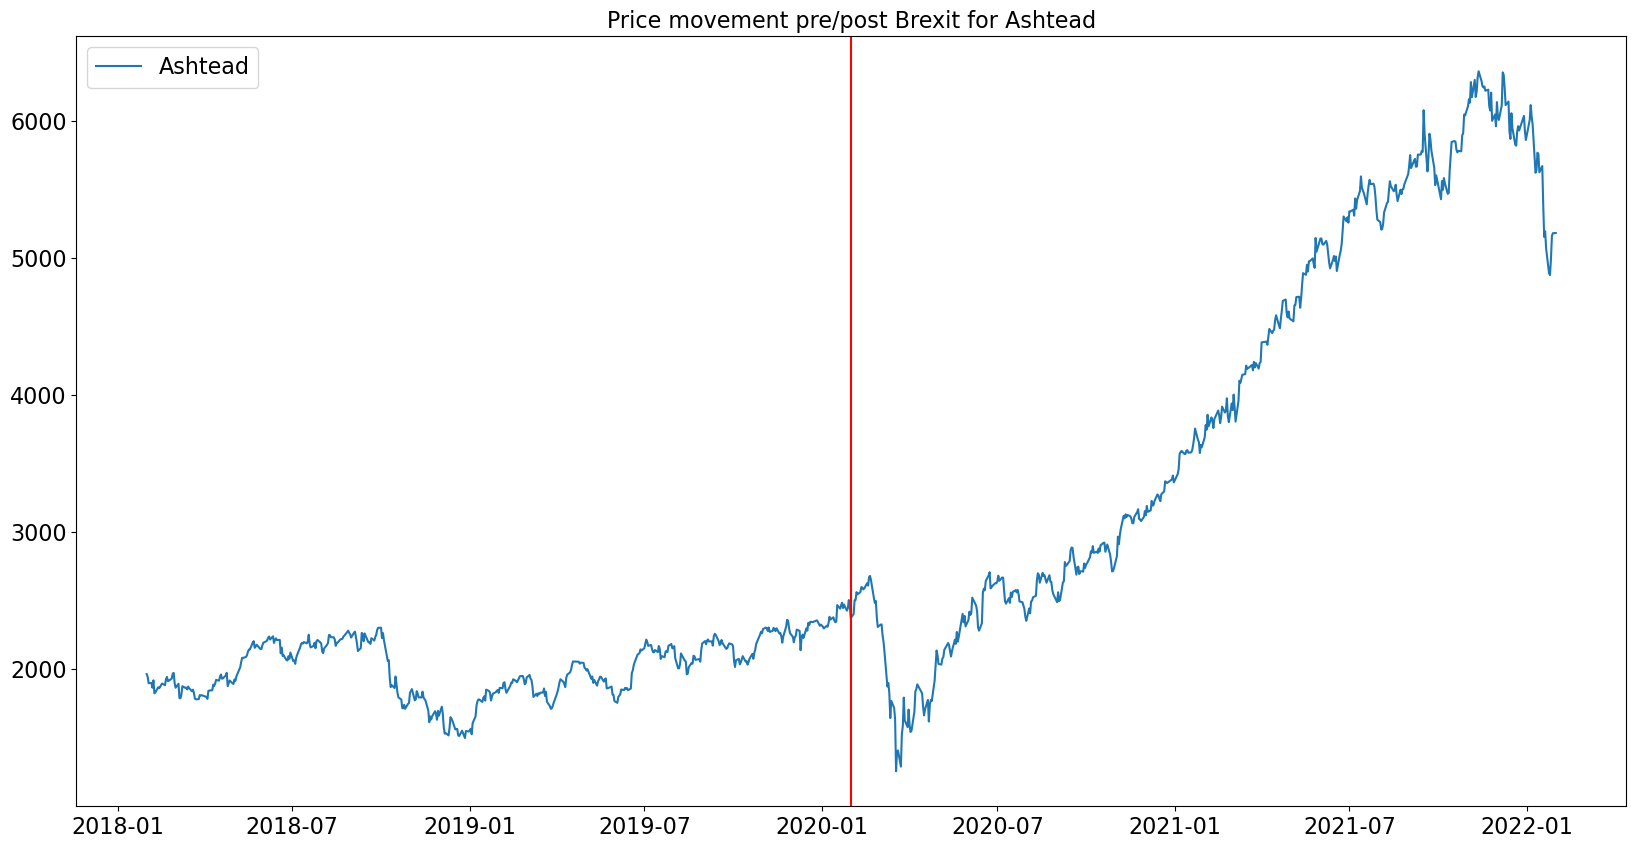

In [16]:
# Set title
plt.title('Price movement pre/post Brexit for Ashtead')

# Define X and Y axes
plt.plot(x, y3, label='Ashtead')

# Add legend key and line for Brexit
plt.legend()
plt.axvline(brexit_date, color="r")


In both cases we can observe stagnant or declining prices in the approach to Brexit, followed by a dramatic fall in prices shortly after Brexit happened.

Thereafter, strong growth can be observed as all stocks reach new highs.

This pattern is interesting, but four companies is hardly a representative sample.

## Now let us see if the pattern repeats with the FTSE 250 stocks.

In [17]:
filt = p1_df['Market'] == 'FTSE 250'

In [18]:
p1_df = p1_df[filt]

In [19]:
tickers = []

for i in p1_df['Symbols']:
    tickers.append(i)

In [20]:
tickers

['BRWM.L',
 'DRX.L',
 'FAN.L',
 'FUTR.L',
 'FXPO.L',
 'IDS.L',
 'INDV.L',
 'PFD.L',
 'PNL.L',
 'WOSG.L']

In [21]:
f250_df = pdr.get_data_yahoo(tickers, b_minus_2, b_plus_2)

In [22]:
f250_df = f250_df['Adj Close']

In [23]:
f250_df.head()

Symbols,BRWM.L,DRX.L,FAN.L,FUTR.L,FXPO.L,IDS.L,INDV.L,PFD.L,PNL.L,WOSG.L
Date,,,,,,,,,,
2018-01-31,303.852509,208.649460,201.899246,333.173157,137.393311,354.475250,2013.5,40.008068,383.613586,NaN
2018-02-01,307.292297,201.587479,200.055405,347.585175,139.230270,374.709442,2043.0,40.155159,382.201599,NaN
2018-02-02,301.559296,196.772461,199.133499,345.465759,131.411484,383.845001,1978.0,40.106133,380.318817,NaN
2018-02-05,298.883820,193.722977,194.523926,339.107483,136.027374,387.167053,1977.0,39.762924,377.965393,NaN
2018-02-06,290.857513,185.376984,188.992447,317.065552,134.425964,383.845001,1933.5,39.125542,373.258514,NaN


In [24]:
f250_df.reset_index(drop=False, inplace=True)

**Now we prepare the chart.**

As with the FTSE 100 performers, the chart is split in two parts to avoid squashing it.

In [25]:
x = f250_df['Date']
y1 = f250_df['BRWM.L']
y2 = f250_df['DRX.L']
y3 = f250_df['FAN.L']
y4 = f250_df['FUTR.L']
y5 = f250_df['FXPO.L']
y6 = f250_df['IDS.L']
y7 = f250_df['INDV.L']
y8 = f250_df['PFD.L']
y9 = f250_df['PNL.L']
y10 = f250_df['WOSG.L']

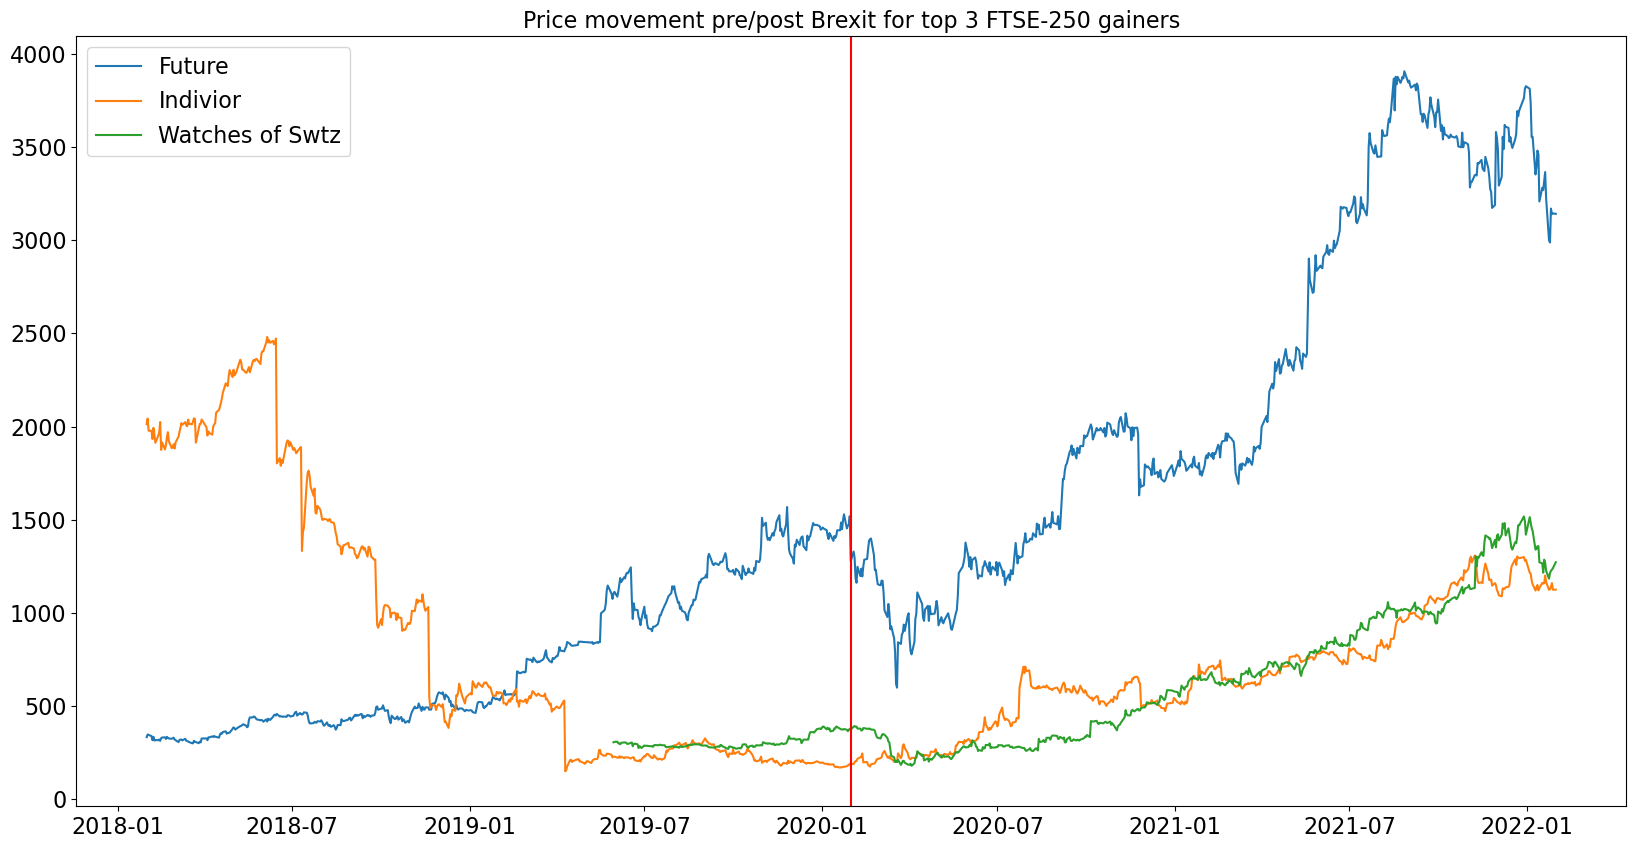

In [43]:
# Set title
plt.title('Price movement pre/post Brexit for top 3 FTSE-250 gainers')

# Define X and Y axes
plt.plot(x, y4, label='Future')
plt.plot(x, y7, label='Indivior')
plt.plot(x, y10, label='Watches of Swtz')

# Add legend key and line for Brexit
plt.legend()
plt.axvline(brexit_date, color="r")

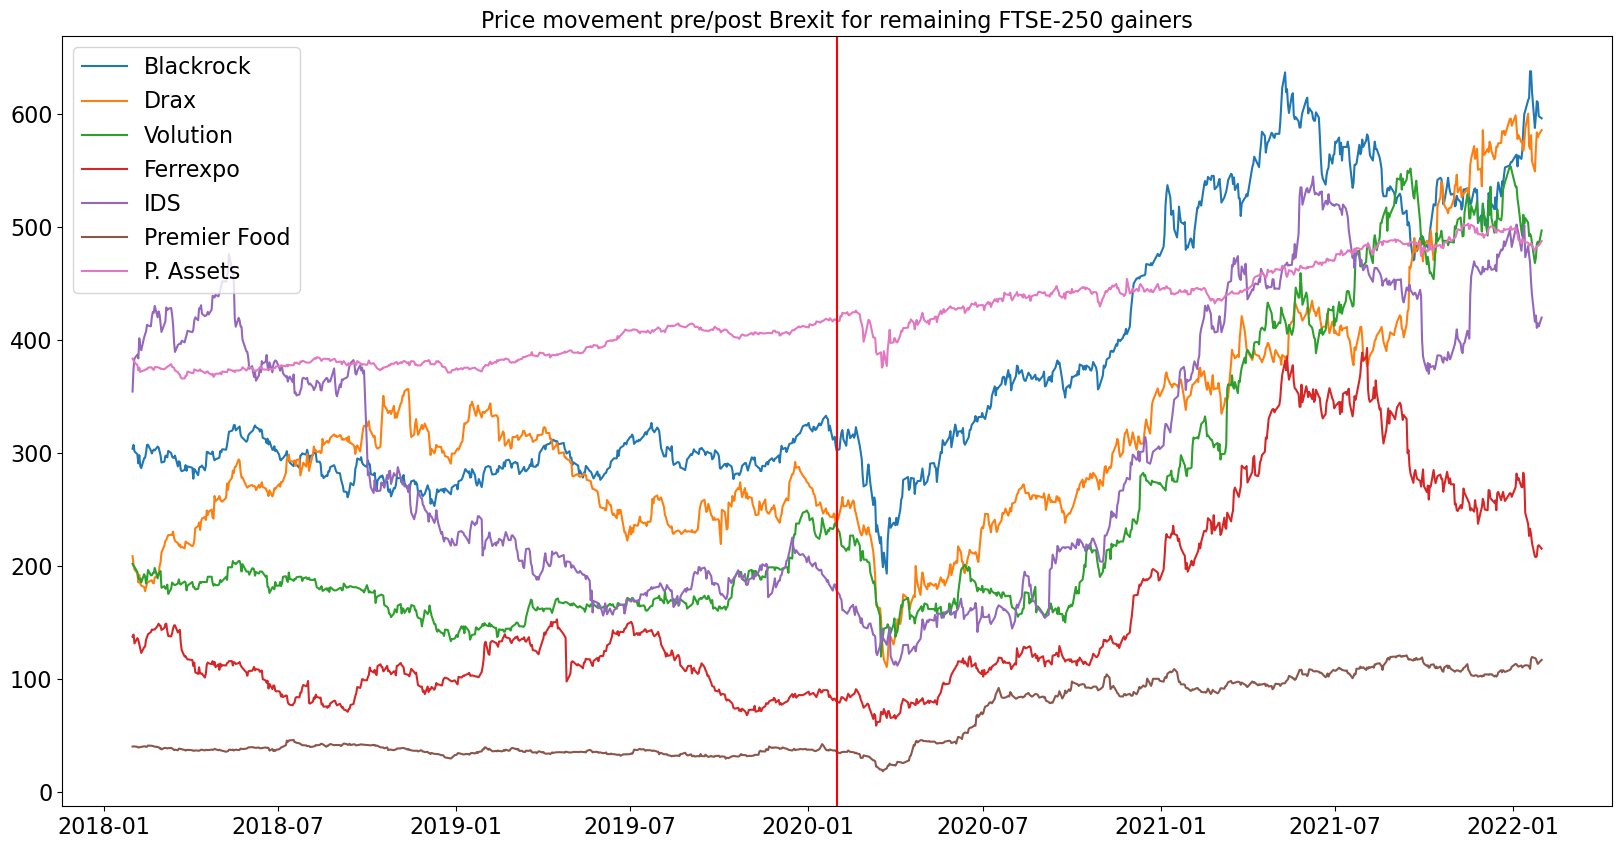

In [44]:
# Set title
plt.title('Price movement pre/post Brexit for remaining FTSE-250 gainers')

# Define X and Y axes
plt.plot(x, y1, label='Blackrock')
plt.plot(x, y2, label='Drax')
plt.plot(x, y3, label='Volution')
plt.plot(x, y5, label='Ferrexpo')
plt.plot(x, y6, label='IDS')
plt.plot(x, y8, label='Premier Food')
plt.plot(x, y9, label='P. Assets ')

# Add legend key and line for Brexit
plt.legend(loc='upper left')
plt.axvline(brexit_date, color="r")


We can observe from the two charts above that the pattern observed with the top performers in the FTSE 100 is repeated by some, but not all companies.

In particular, those in the middle of the second chart (Blackrock, Draw, Volution, Ferrexpo, and International Distribution Service experience a dip in prices post Brexit and then rapidly improve and surpass the high of the previous two years.

However there are some outliers, e.g: 

- Personal Assets Trust appears unimpacted and the earlier trend continues
- Individior suffers a crash in prices pre-Brexit which only partially recovers

Part 3 will review these trends against international data.